In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Point
from shapely.geometry import Polygon

In [2]:
# Load Data
enei = pd.read_excel('./data/shapefile.xlsx')
# portugal = gpd.read_file('./data/BGRI_2011/CONTINENTE/BGRI11_CONT.shp')

In [3]:
portugal_shape = gpd.read_file('./data/poligon_portugal/Continente_dissolve.shp')

In [4]:
enei.shape

(2132, 3)

In [5]:
enei.head(5)

,Concelho,Curso,enei
0,Estremoz,Técnico/a de Eletrotecnia,4
1,Estremoz,Técnico de Gestão de Equipamentos Informáticos,1
2,Évora,Técnico de Gestão e Programação de Sistemas In...,1
3,Évora,Técnico de Manutenção Industrial - Manutenção ...,1
4,Évora,Técnico de Manutenção Industrial - Eletromecânica,3


In [6]:
count_of_courses = enei.groupby(by="Concelho").sum()

In [7]:
count_of_courses['qtd_cursos'] = enei.groupby(by="Concelho").count().Curso

In [9]:
# count_of_courses.index.to_list()

count_of_courses.head()

,enei,qtd_cursos
Concelho,,
Abrantes,12,8
Aguiar da Beira,1,2
Albergaria-a-Velha,19,13
Albufeira,4,8
Alcanena,2,2


In [10]:
portugalDTMN11 = portugal[['DTMN11','LUG11DESIG']].drop_duplicates()
portugalDTMN11.index =portugalDTMN11.LUG11DESIG
new_count = count_of_courses.merge(portugalDTMN11, how="left",left_on=count_of_courses.index,right_on=portugalDTMN11.index )

NameError: name 'portugal' is not defined

In [11]:
portugalDTMN11.index = portugalDTMN11.LUG11DESIG

NameError: name 'portugalDTMN11' is not defined

In [12]:
 portugalDTMN11[portugalDTMN11['LUG11DESIG']=='Óbidos']

NameError: name 'portugalDTMN11' is not defined

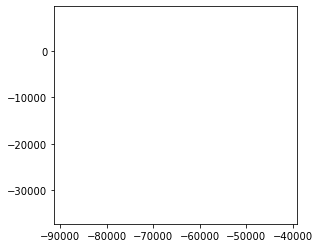

In [101]:
portugal[portugal['LUG11DESIG']=='Óbidos'].plot(facecolor='white')

In [13]:
# portugal['geometry'] = portugal.buffer(0.01)

In [14]:
# portugal_DTMN = portugal.dissolve(by='DTMN11')

In [15]:
# portugal_DTMN.to_file("municipalities.geojson", driver='GeoJSON')

In [17]:
# portugalDTMN11[portugalDTMN11['LUG11DESIG'].duplicated()]

In [18]:
new_count[new_count['LUG11DESIG'].duplicated()]

NameError: name 'new_count' is not defined

NameError: name 'new_count' is not defined

In [145]:
new_count[new_count['LUG11DESIG'].duplicated()]

,key_0,enei,qtd_cursos,DTMN11,LUG11DESIG
6,Alcobaça,21,13,1001,Alcobaça
11,Alijó,3,2,0305,Alijó
12,Alijó,3,2,1701,Alijó
16,Almeida,0,1,1305,Almeida
18,Almeirim,7,6,0206,Almeirim
...,...,...,...,...,...
487,Vila do Conde,23,14,1713,Vila do Conde
489,Vinhais,1,1,0109,Vinhais
490,Vinhais,1,1,1813,Vinhais
493,Vizela,6,4,0307,Vizela


In [20]:
portugal_concelhos = gpd.read_file('./data/concelhos-shapefile/concelhos.shp')

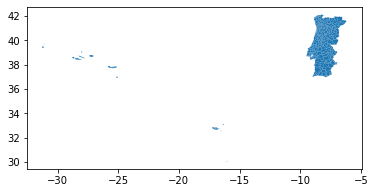

In [21]:
portugal_concelhos[portugal_concelhos['NAME_0']=="Portugal"].plot()

In [22]:
portugal_concelhos.groupby('NAME_2').count()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
NAME_2,,,,,,,,,,,,,,
Abrantes,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Aguiar da Beira,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Alandroal,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Albergaria-a-Velha,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Albufeira,1,1,1,1,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vouzela,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Águeda,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Évora,1,1,1,1,1,1,1,1,1,1,1,0,0,1


In [23]:
result = gpd.GeoDataFrame(count_of_courses.merge(portugal_concelhos[['NAME_2','geometry']],how='left',left_on=[count_of_courses.index],right_on=[portugal_concelhos[['NAME_2','geometry']].NAME_2] ))

In [24]:
result.crs

In [25]:
# portugal_shape.to_crs({'init': 'epsg:4326'}).plot()

In [26]:
# s.crs = {'init': 'epsg:4326', 'no_defs': True}

In [27]:
portugal_shape = portugal_shape.to_crs({'init': 'epsg:4326'})

In [28]:
result.crs = {'init': 'epsg:4326', 'no_defs': True}


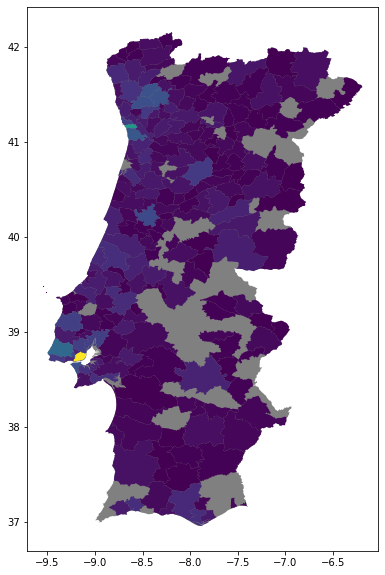

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
portugal_shape.plot(ax=ax, facecolor='gray', zorder=1)
result.plot(ax=ax, zorder=100, column='qtd_cursos') 

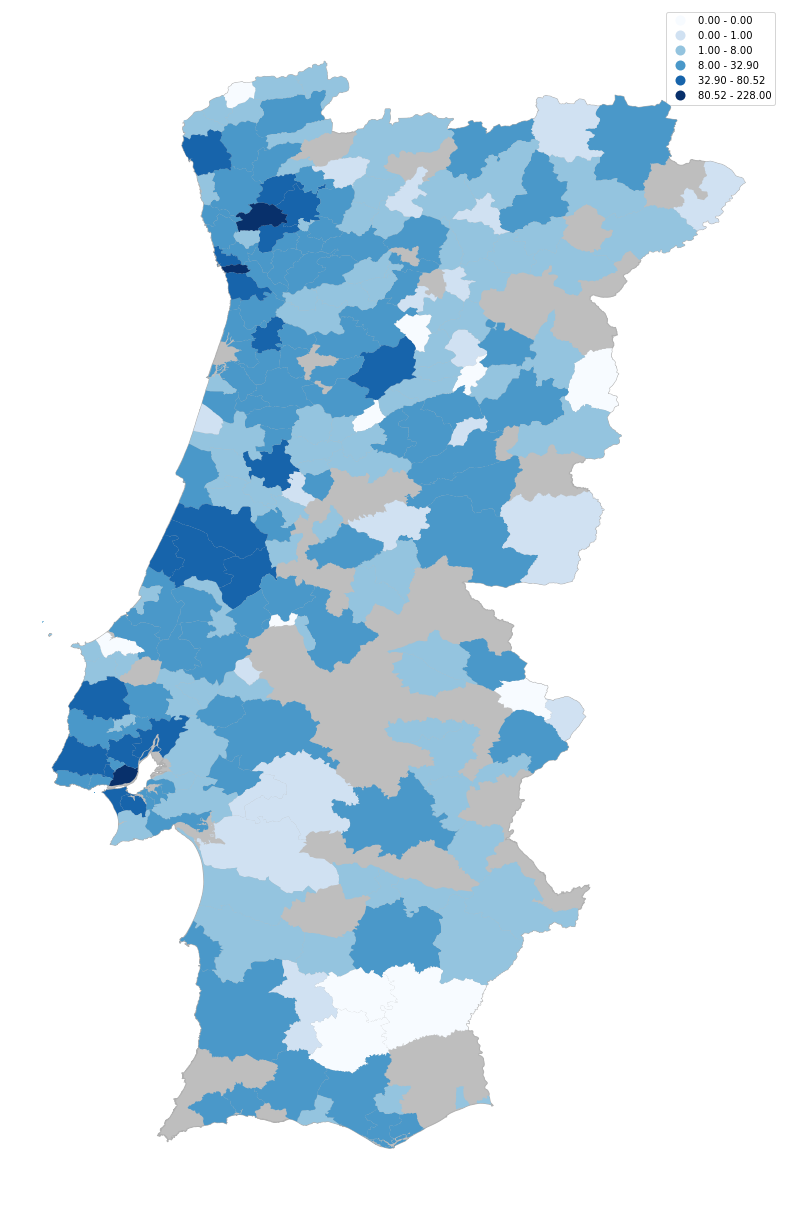

In [30]:
fig, ax = plt.subplots(figsize=(22,22))
ax.axis('off')
portugal_shape.plot(ax=ax, facecolor='#BEBEBE', zorder=1,edgecolor='#B0B0B0')
result.plot(ax=ax, zorder=100, column=' enei',cmap='Blues',k=5,scheme="Percentiles",legend=True)


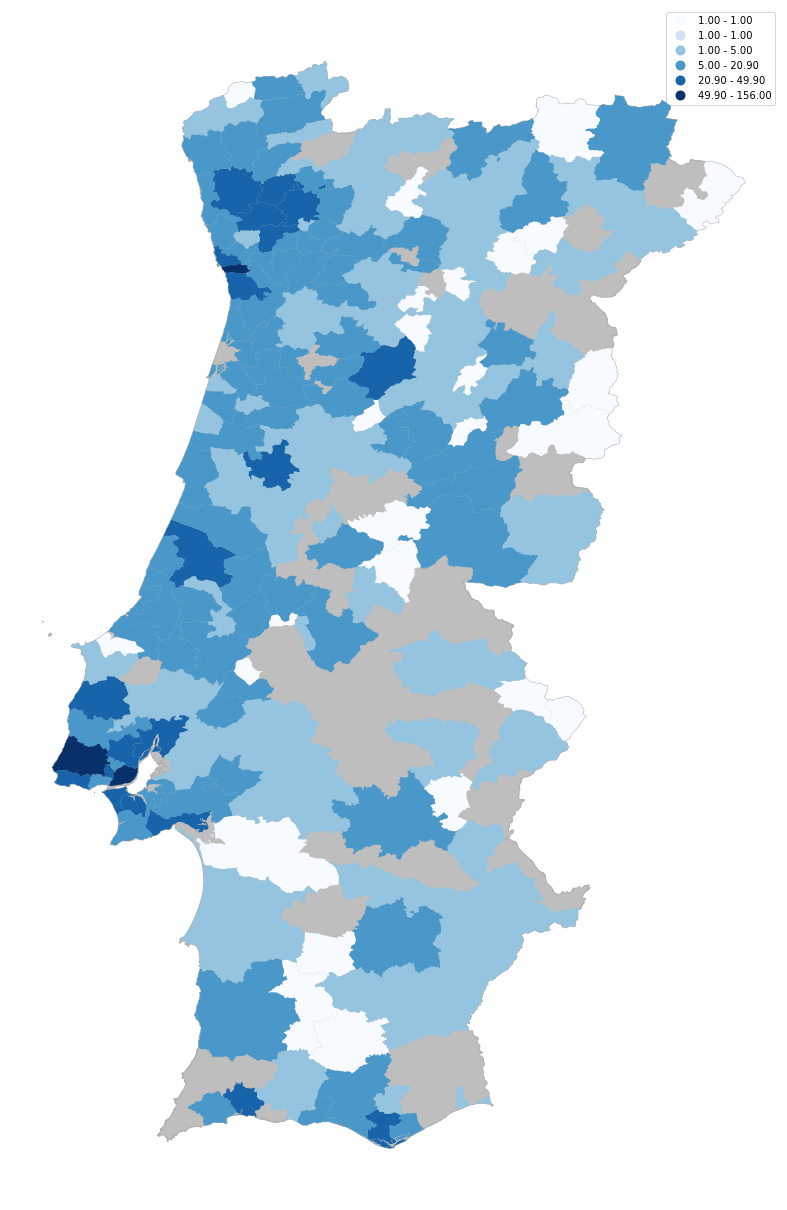

In [31]:

fig, ax = plt.subplots(figsize=(22,22))
ax.axis('off')
portugal_shape.plot(ax=ax, facecolor='#BEBEBE', zorder=1,edgecolor='#B0B0B0')
result.plot(ax=ax, zorder=100, column='qtd_cursos',cmap='Blues',k=5,scheme="Percentiles",legend=True)


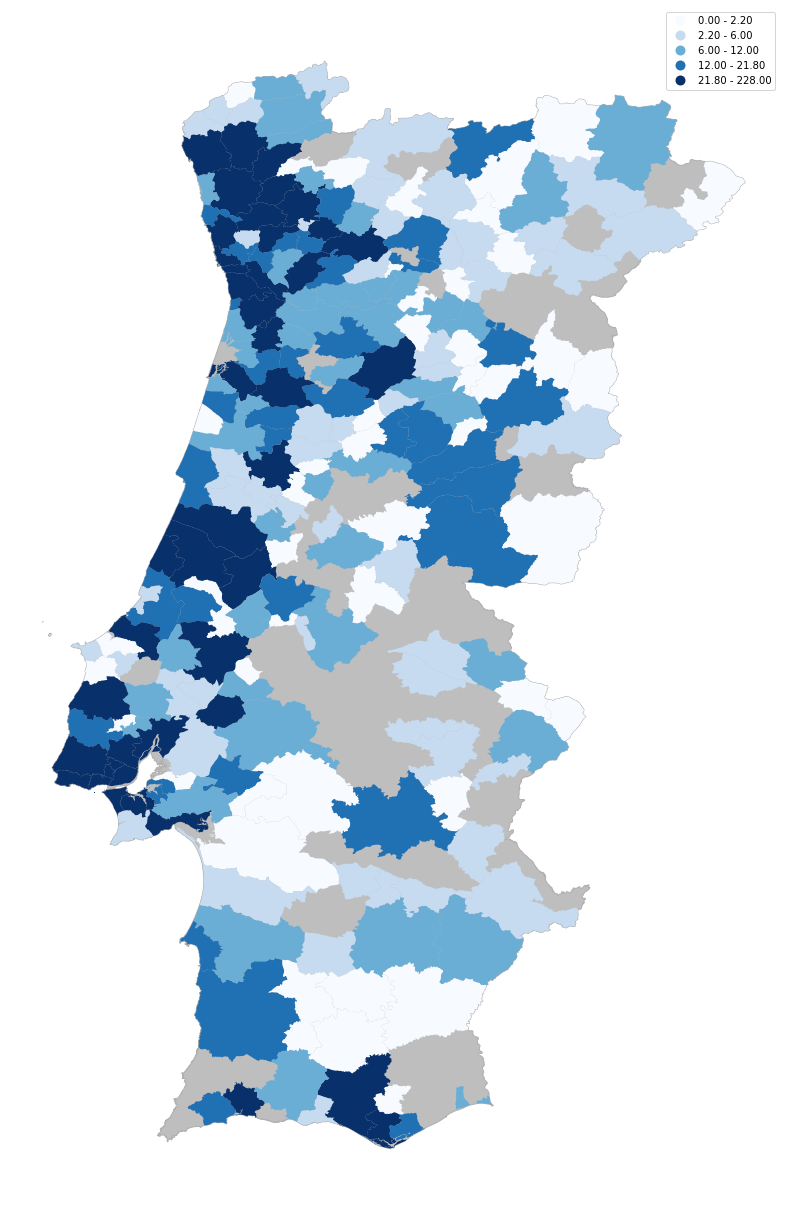

In [32]:
fig, ax = plt.subplots(figsize=(22,22))
ax.axis('off')
portugal_shape.plot(ax=ax, facecolor='#BEBEBE', zorder=1,edgecolor='#B0B0B0')
result.plot(ax=ax, zorder=100, column=' enei',cmap='Blues',k=5,scheme="Quantiles",legend=True)

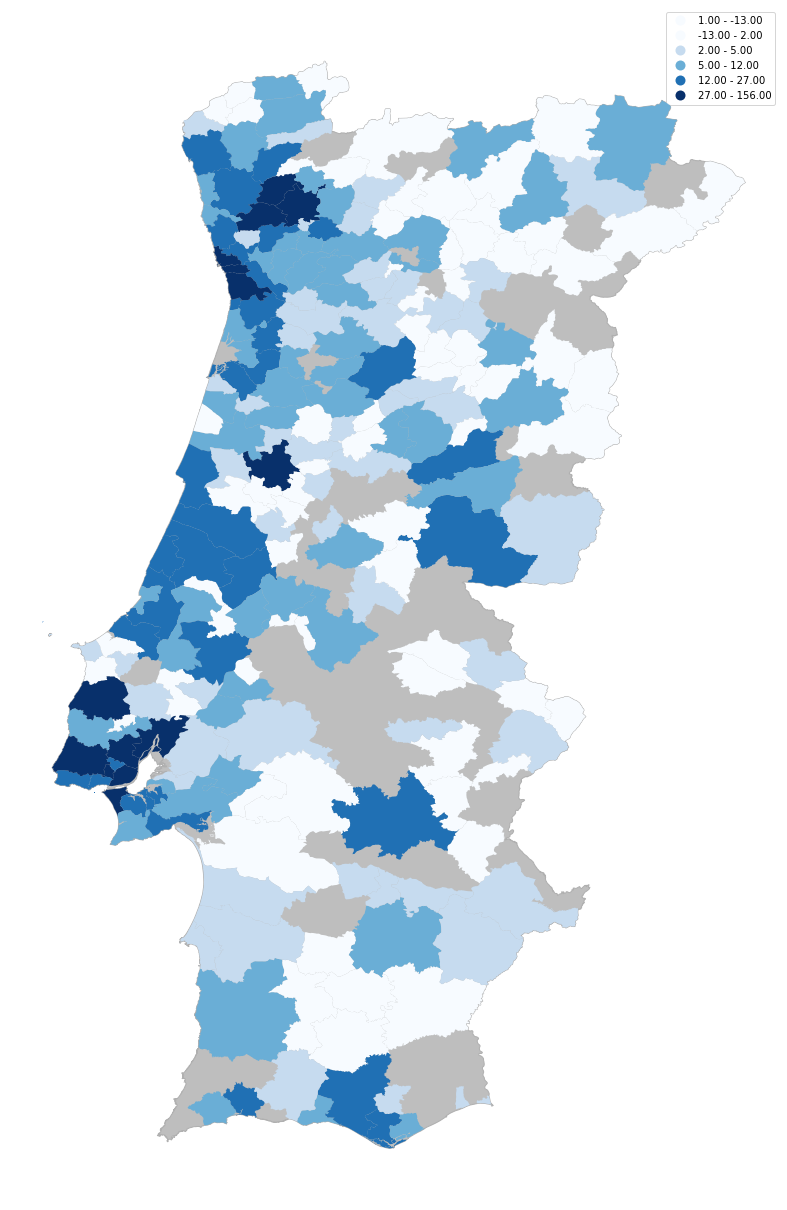

In [39]:
fig, ax = plt.subplots(figsize=(22,22))
ax.axis('off')
portugal_shape.plot(ax=ax, facecolor='#BEBEBE', zorder=1,edgecolor='#B0B0B0')
result.plot(ax=ax, zorder=100, column='qtd_cursos',cmap='Blues',k=5,scheme="BoxPlot",legend=True)

In [35]:
count_of_courses.to_csv('./data/output.csv')